# HISA (HackIllinois Stock Analysis)

                         open       high       low      close    volume
date                                                                   
2019-02-19 09:30:00  1117.530  1128.3000  1116.890  1127.9800  215010.0
2019-02-19 10:30:00  1128.010  1128.0100  1124.540  1124.5400  102533.0
2019-02-19 11:30:00  1124.469  1127.8600  1124.469  1126.5400   98369.0
2019-02-19 12:30:00  1126.380  1126.3800  1123.325  1124.5050   73454.0
2019-02-19 13:30:00  1124.000  1125.9766  1122.700  1125.9766   66033.0


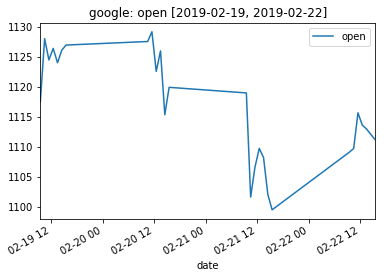

In [7]:
import hisa
import os


os.environ['ALPHA_VANTAGE_API_KEY'] = 'REUDU2I6LTXIN065'

google = hisa.Share('GOOGL', 'google', interval='intraday', minute_interval='60min', start='02/19/2019',size='compact')
print(google.data.head())
# google.generate_twitter_sentiment('google_tweets.json', start='02/19/2019')
google.plot(column='open')

4.3418613059702125


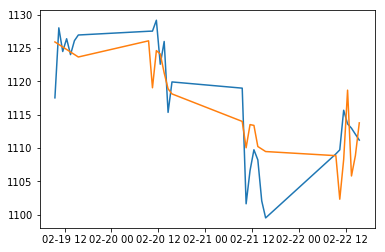

In [12]:
from hisa.learn.models import LinearModel
import matplotlib.pyplot as plt
import pandas as pd

lin_model = LinearModel('./hisa/learn/data/google_feat_vec.csv', './hisa/learn/data/hourly_stocks.csv', 'google')
lin_model.train() 

df = pd.read_csv('./hisa/learn/data/hourly_stocks.csv')
dates = pd.to_datetime(df['date'])

plt.plot(dates, df['google_open'].values)
plt.plot(dates, lin_model.predict())

print(lin_model.mape())

4.736718937278015


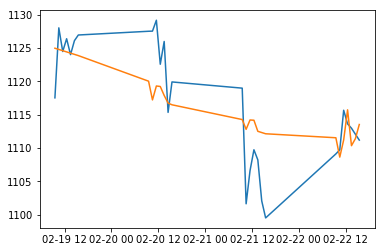

In [13]:
from hisa.learn.models import RidgeModel
import matplotlib.pyplot as plt
import pandas as pd

ridge_model = RidgeModel('./hisa/learn/data/google_feat_vec.csv', './hisa/learn/data/hourly_stocks.csv', 'google')
ridge_model.train() 

df = pd.read_csv('./hisa/learn/data/hourly_stocks.csv')
dates = pd.to_datetime(df['date'])

plt.plot(dates, df['google_open'].values)
plt.plot(dates, ridge_model.predict())

print(ridge_model.mape())

7.761485714285714


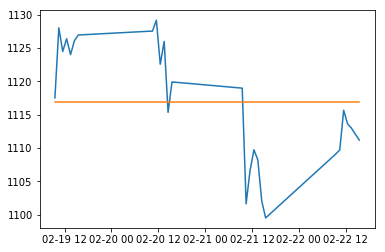

In [14]:
from hisa.learn.models import MLPModel
import matplotlib.pyplot as plt
import pandas as pd

mlp_model = MLPModel('./hisa/learn/data/google_feat_vec.csv', './hisa/learn/data/hourly_stocks.csv', 'google')
mlp_model.train() 

df = pd.read_csv('./hisa/learn/data/hourly_stocks.csv')
dates = pd.to_datetime(df['date'])

plt.plot(dates, df['google_open'].values)
plt.plot(dates, mlp_model.predict())

print(mlp_model.mape())